#### PART 1 - Project's Goals 🎯🎯🎯

In this project, I will analyze  a dataset that contains the most streamed songs on audio streaming platform Spotify, Apple and Deezer as of 2023.🎶 

📊 What I will research and analyze? 

The main objective of this project is finding out what makes a song popular... looking forward to discover?
🎶 📊 🎶
- Which musical scales have the highest total streams?
- What are the seasonal trends in music streaming, and how do average streams per song vary by release month from 2015 to 2023?
- What Is The Most Popular Month by Number of Songs Released?
- What is the distribution of song release days within a month, and are there specific days that have a higher or lower number of releases?
- Do listeners especially listen to certain modes? which mode is more common?
- What are the correlations between various music-related metrics, and how do they influence each other?
- Which artists have the highest total streams?
- Which artists have the most songs featured in the top songs list?
- What is the distribution of song tempos (BPM) in the dataset, and how does it relate to the popularity of songs?
- How does the energy percentage of a song relate to its total stream count?




#### Step 1: Importing Necessary Libraries   📚 
Import all the libraries we need for our work:

 - panda
 - seaborn
 - matplotlib.pyplot
 - datetime
 - numpy

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

## Step 2: Loading The Dataset ⏳
This is the step where we load our dataset using pandas, in this case we will load a dataset called Top Spotify Songs 2023

In [2]:
spotify_df = pd.read_csv("Spotify-data-Music3.csv")

In [3]:
# Viewing some information about the table:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [5]:
spotify_df["key"].unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

## Step 3: EDA and Data Cleaning  🔍📋
This is the step where we analyze the data to know if there are problems in it and solving these problems

In [6]:
# We'll swap the null values for C#:
spotify_df["key"] = spotify_df["key"].fillna(value = "C#")

In [7]:
#combine the columns into a single 'release_date' column
spotify_df['release_date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                    spotify_df['released_month'].astype(str) + '-' +
                                    spotify_df['released_day'].astype(str))

#drop the original year, month, and day columns
#spotify_df.drop(columns=['released_year', 'released_month', 'released_day'], inplace=True)

In [8]:
#coercing errors so that if there's something that isn't a number, we can drop it.
spotify_df["streams"] = pd.to_numeric(spotify_df["streams"], errors = 'coerce')

In [9]:
spotify_df[spotify_df["streams"].isna()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,NaN,16,...,Major,53,75,69,7,0,17,3,https://i.scdn.co/image/ab67616d0000b2739a0011...,1970-01-01


In [10]:
# drop the raw where streams is NaN so we can make the change for datatype
spotify_df.drop(spotify_df[spotify_df["streams"].isna()].index, inplace = True)

In [11]:
#convert streams column from object to int
spotify_df["streams"] = spotify_df["streams"].astype(int)

In [12]:
# create a copy with unique and not null values 
spotify_uniq = spotify_df.copy()
songs_eda = spotify_df.copy()

In [13]:
spotify_uniq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    int64         
 4   released_month        952 non-null    int64         
 5   released_day          952 non-null    int64         
 6   in_spotify_playlists  952 non-null    int64         
 7   in_spotify_charts     952 non-null    int64         
 8   streams               952 non-null    int64         
 9   in_apple_playlists    952 non-null    int64         
 10  in_apple_charts       952 non-null    int64         
 11  in_deezer_playlists   952 non-null    object        
 12  in_deezer_charts      952 non-null    int64         
 13  in_shazam_charts      902

In [14]:
#checking for duplicates 
print(f"How many duplicates?    :     {spotify_uniq.duplicated().sum()}")

How many duplicates?    :     0


In [15]:
spotify_uniq[spotify_uniq["in_shazam_charts"].isna()]

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url,release_date
14,As It Was,Harry Styles,1,2022,3,31,23575,130,2513188493,403,...,Minor,52,66,73,34,0,31,6,https://i.scdn.co/image/ab67616d0000b2732e8ed7...,2022-03-31
54,Another Love,Tom Odell,1,2012,10,15,18371,83,1813673666,250,...,Minor,45,13,54,70,0,9,4,https://i.scdn.co/image/ab67616d0000b2731917a0...,2012-10-15
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,Major,50,38,80,0,0,9,7,https://i.scdn.co/image/ab67616d0000b2738863bc...,2019-11-29
71,Heat Waves,Glass Animals,1,2020,6,28,22543,63,2557975762,386,...,Major,76,53,53,44,0,9,9,https://i.scdn.co/image/ab67616d0000b273712701...,2020-06-28
73,Sweater Weather,The Neighbourhood,1,2012,5,14,16413,61,2282771485,166,...,Major,61,41,81,5,2,10,3,https://i.scdn.co/image/ab67616d0000b2738265a7...,2012-05-14
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,Major,50,45,41,75,0,11,3,https://i.scdn.co/image/ab67616d0000b273fc2101...,2018-11-08
127,Watermelon Sugar,Harry Styles,1,2019,11,17,21915,34,2322580122,437,...,Major,55,56,82,12,0,34,5,https://i.scdn.co/image/ab67616d0000b27377fdcf...,2019-11-17
158,Ghost,Justin Bieber,1,2021,3,19,5866,24,1167330737,107,...,Major,61,41,74,21,0,40,6,https://i.scdn.co/image/ab67616d0000b273e6f407...,2021-03-19
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,Minor,73,31,69,6,0,11,4,https://i.scdn.co/image/ab67616d0000b2739a494f...,2019-10-04
180,Night Changes,One Direction,1,2014,11,17,7124,18,1131090940,60,...,Major,67,40,52,86,0,12,4,https://i.scdn.co/image/ab67616d0000b273d304ba...,2014-11-17


In [16]:
# Looking for data where both are null values
checknull = (spotify_uniq.in_shazam_charts.isna()) & (spotify_uniq['key'].isna())
print(f"In how many rows both values are null : {spotify_uniq[checknull].shape[0]} rows")
spotify_uniq.loc[checknull,['key','in_shazam_charts']].head(10)

In how many rows both values are null : 0 rows


,key,in_shazam_charts


In [17]:
# Drop all null values and duplicated values
spotify_uniq.dropna(axis=0,inplace=True)

In [18]:
# Drop cover_url column 
spotify_uniq.drop(columns=['cover_url'],inplace=True)

In [19]:
spotify_uniq.isna().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
release_date            0
dtype: int64

In [20]:
spotify_uniq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 902 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            902 non-null    object        
 1   artist(s)_name        902 non-null    object        
 2   artist_count          902 non-null    int64         
 3   released_year         902 non-null    int64         
 4   released_month        902 non-null    int64         
 5   released_day          902 non-null    int64         
 6   in_spotify_playlists  902 non-null    int64         
 7   in_spotify_charts     902 non-null    int64         
 8   streams               902 non-null    int64         
 9   in_apple_playlists    902 non-null    int64         
 10  in_apple_charts       902 non-null    int64         
 11  in_deezer_playlists   902 non-null    object        
 12  in_deezer_charts      902 non-null    int64         
 13  in_shazam_charts      902

In [21]:
# Data conversion for columns we need as integers
spotify_uniq['in_deezer_playlists'] = pd.to_numeric(spotify_uniq['in_deezer_playlists'], errors='coerce').fillna(0).astype(int)
spotify_uniq['in_shazam_charts'] = pd.to_numeric(spotify_uniq['in_shazam_charts'], errors='coerce').fillna(0).astype(int)


In [22]:
print(spotify_uniq['in_deezer_playlists'].dtype)


int64


In [23]:
spotify_uniq.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
artist_count,902.0,1.566519e+00,8.886439e-01,1.0,1.000000e+00,1.0,2.000000e+00,8.000000e+00
released_year,902.0,2.018480e+03,1.080259e+01,1930.0,2.020250e+03,2022.0,2.022000e+03,2.023000e+03
released_month,902.0,6.035477e+00,3.561551e+00,1.0,3.000000e+00,5.0,9.000000e+00,1.200000e+01
released_day,902.0,1.392018e+01,9.199132e+00,1.0,6.000000e+00,13.0,2.200000e+01,3.100000e+01
in_spotify_playlists,902.0,4.800010e+03,7.614430e+03,31.0,8.455000e+02,2008.5,4.892250e+03,5.289800e+04
in_spotify_charts,902.0,1.188248e+01,1.915599e+01,0.0,0.000000e+00,3.0,1.600000e+01,1.470000e+02
streams,902.0,4.692324e+08,5.198065e+08,2762.0,1.367662e+08,269727954.5,5.988657e+08,3.562544e+09
in_apple_playlists,902.0,6.053659e+01,7.509271e+01,0.0,1.200000e+01,32.0,8.000000e+01,5.320000e+02
in_apple_charts,902.0,5.018625e+01,4.974886e+01,0.0,6.250000e+00,35.0,8.400000e+01,2.750000e+02
in_deezer_playlists,902.0,9.022616e+01,1.583227e+02,0.0,9.000000e+00,30.0,8.700000e+01,9.740000e+02


In [24]:
spotify_uniq.describe(include=np.number)

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,9.020000e+02,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,1.566519,2018.480044,6.035477,13.920177,4800.009978,11.882483,4.692324e+08,60.536585,50.186253,90.226164,2.525499,50.835920,122.390244,67.169623,51.319290,64.329268,26.772727,1.644124,18.194013,10.288248
std,0.888644,10.802595,3.561551,9.199132,7614.429777,19.155985,5.198065e+08,75.092708,49.748855,158.322701,5.751698,126.134689,27.889401,14.650688,23.514183,16.615225,25.869141,8.624666,13.725833,10.064777
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.250000,3.000000,6.000000,845.500000,0.000000,1.367662e+08,12.000000,6.250000,9.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,5.000000,13.000000,2008.500000,3.000000,2.697280e+08,32.000000,35.000000,30.000000,0.000000,2.000000,120.000000,69.000000,51.000000,66.000000,17.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,4892.250000,16.000000,5.988657e+08,80.000000,84.000000,87.000000,2.000000,35.750000,140.000000,78.000000,70.000000,77.000000,42.000000,0.000000,23.000000,12.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.562544e+09,532.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


##### What did I learn here?
    -Die For You has the highest appearance Track

    -Taylor Swift has the highest appearance Artisrt

    -C# is the highest known appearance Key

In [25]:
mask_low_streams = spotify_uniq["streams"]<10000000

In [26]:
# Songs streamed above median 
cond = (spotify_uniq.streams >= 263836779.5)
spotify_uniq[cond].sort_values(ascending=False,by='streams')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,2017-01-06
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2018-10-09
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2016-04-04
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2021-07-09
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2017-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,X SI VOLVEMOS,"Karol G, Romeo Santos",2,2023,2,2,2127,33,266624541,45,...,C#,Minor,79,58,78,34,0,11,25,2023-02-02
183,Car's Outside,James Arthur,1,2019,10,18,794,10,265882712,38,...,A,Major,34,24,56,4,0,11,3,2019-10-18
901,After LIKE,IVE,1,2022,8,22,767,12,265548837,20,...,C#,Major,68,80,92,10,0,9,12,2022-08-22
889,Attention,NewJeans,1,2022,8,1,799,12,264717480,14,...,A#,Minor,81,70,65,24,0,8,4,2022-08-01


In [27]:
spotify_uniq

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


In [28]:
# Song(s) with the highest Spotify ranking
cond = (spotify_uniq['in_spotify_charts'] == 1)
spotify_uniq[cond].sort_values(by='streams',ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
672,HUMBLE.,Kendrick Lamar,1,2017,3,30,33206,1,1929770265,284,...,C#,Minor,91,42,60,0,0,9,12,2017-03-30
871,Sweet Child O' Mine,Guns N' Roses,1,1987,1,1,41231,1,1553497987,228,...,F#,Major,45,67,90,9,11,10,5,1987-01-01
695,Adore You,Harry Styles,1,2019,12,6,13454,1,1439191367,246,...,G#,Major,68,57,77,2,0,10,5,2019-12-06
756,Golden,Harry Styles,1,2019,12,13,8429,1,807015863,85,...,E,Minor,45,25,84,21,0,13,6,2019-12-13
732,X ï¿½ï¿½LTIMA,"Daddy Yankee, Bad Bunny",2,2022,3,25,2697,1,349746291,55,...,G,Major,81,59,83,9,0,11,5,2022-03-25
828,Music For a Sushi Restaurant,Harry Styles,1,2022,5,20,4449,1,334733572,80,...,B,Major,72,36,72,26,6,11,4,2022-05-20
786,Un Verano Sin Ti,Bad Bunny,1,2022,5,6,1004,1,283332261,8,...,F,Minor,50,41,50,69,0,12,6,2022-05-06
583,ELEVEN,IVE,1,2021,12,1,521,1,247737946,17,...,A,Major,83,59,73,6,0,5,11,2021-12-01
667,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7,2022,1,14,1034,1,245400167,19,...,F,Minor,67,74,75,44,0,7,30,2022-01-14
822,San Lucas,Kevin Kaarl,1,2019,11,7,407,1,244891912,5,...,G,Major,58,27,36,86,0,9,3,2019-11-07


In [29]:
# Songs with the highest Apple ranking
cond = (spotify_uniq['in_apple_charts'] == 1)
spotify_uniq[cond].sort_values(by='streams',ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,F,Major,47,25,43,62,0,32,3,2020-03-20
424,Running Up That Hill (A Deal With God),Kate Bush,1,1985,9,16,21811,0,1024858327,117,...,A#,Minor,63,20,55,72,0,6,6,1985-09-16
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",3,2013,1,1,52898,0,933815613,203,...,F#,Minor,79,87,81,4,0,10,4,2013-01-01
675,Swim,Chase Atlantic,1,2017,10,4,2742,0,498960285,5,...,G#,Major,67,8,54,27,0,8,4,2017-10-04
664,Mount Everest,Labrinth,1,2019,6,21,5443,0,467727006,45,...,C#,Minor,46,43,43,23,8,8,22,2019-06-21
283,Lovers Rock,TV Girl,1,2014,6,5,6339,13,466231982,3,...,F,Minor,56,57,87,0,1,10,4,2014-06-05
457,Happy Xmas (War Is Over),"John Lennon, The Harlem Community Choir, The P...",4,1971,12,1,10829,0,460492795,130,...,D,Major,33,39,61,32,0,77,3,1971-12-01
448,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,1,1959,11,16,6512,0,446390129,88,...,C#,Major,45,72,24,91,0,18,4,1959-11-16
837,La Llevo Al Cielo (Ft. ï¿½ï¿½engo F,"Nengo Flow, Anuel Aa, Chris Jedi, Chencho Corl...",4,2022,5,20,3559,3,333146475,36,...,A,Minor,80,77,85,11,0,17,14,2022-05-20
716,La Zona,Bad Bunny,1,2020,2,29,1188,0,312622938,13,...,C#,Minor,76,81,80,20,0,25,4,2020-02-29


In [30]:
# Song(s) with the highest Deezer ranking
cond = (spotify_uniq['in_deezer_charts'] == 1)
spotify_uniq[cond].sort_values(by='streams',ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,G,Major,68,49,59,16,0,13,28,2016-09-21
693,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",2,2019,6,19,15010,2,2484812918,453,...,A,Minor,76,77,52,4,0,8,3,2019-06-19
189,Take Me To Church,Hozier,1,2013,9,13,23804,31,2135158446,187,...,E,Minor,57,41,66,63,0,12,5,2013-09-13
80,Riptide,Vance Joy,1,1975,1,1,31123,55,2009094673,300,...,C#,Major,48,50,73,43,0,15,4,1975-01-01
720,Wake Me Up - Radio Edit,Avicii,1,2013,1,1,50887,34,1970673297,315,...,D,Major,53,66,78,0,0,16,5,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Piï¿½ï¿½man Deï¿,"Semicenk, Doï¿½ï¿½u",2,2023,6,2,185,3,43522589,5,...,A#,Minor,73,45,62,28,0,13,13,2023-06-02
113,Mine (Taylor's Version),Taylor Swift,1,2023,7,7,99,15,36912123,21,...,G,Major,65,49,78,0,0,17,4,2023-07-07
150,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,A,Minor,81,90,77,1,0,9,5,2023-06-30
30,Rush,Troye Sivan,1,2023,7,13,864,78,22581161,71,...,F,Minor,74,35,84,0,0,11,6,2023-07-13


In [31]:
# Song(s) with the highest Shazam ranking
cond = (spotify_uniq['in_shazam_charts'] == 1)
spotify_uniq[cond].sort_values(by='streams',ascending=False)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
177,Why'd You Only Call Me When You're High?,Arctic Monkeys,1,2013,1,1,23389,29,1267333350,54,...,D,Major,70,81,63,4,0,8,4,2013-01-01
134,505,Arctic Monkeys,1,2007,4,20,13985,25,1217120710,30,...,C#,Major,52,20,85,0,0,7,5,2007-04-20
674,Contection,"GODZZ__-, Zakaria",2,2020,1,16,6955,0,1180896317,65,...,A#,Minor,81,83,75,14,0,29,34,2020-01-16
614,you broke me first,Tate McRae,1,2020,4,17,6638,0,1180094974,167,...,E,Major,64,8,37,79,0,9,5,2020-04-17
856,SLOW DANCING IN THE DARK,Joji,1,2018,9,12,10211,0,1122364376,38,...,D#,Major,52,28,48,54,1,19,3,2018-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,I Know - PR1SVX Edit,"Kanii, PR1ISVX",2,2023,3,24,407,0,77377503,16,...,B,Minor,67,11,76,8,47,30,7,2023-03-24
236,AMERICA HAS A PROBLEM (feat. Kendrick Lamar),"Kendrick Lamar, Beyoncï¿",2,2023,5,19,896,0,57089066,34,...,C#,Major,78,20,70,1,0,16,4,2023-05-19
254,Mejor Que Yo,"Mambo Kingz, DJ Luian, Anuel Aa",3,2023,5,4,675,1,50847624,9,...,C#,Minor,62,56,66,18,0,12,5,2023-05-04
228,Hummingbird (Metro Boomin & James Blake),"James Blake, Metro Boomin",2,2023,6,2,277,1,39666245,1,...,F#,Major,59,26,60,46,1,25,13,2023-06-02


In [32]:
# BPM Level rank
cond = (spotify_uniq['bpm'] >= 1.225809e+02)
spotify_uniq[cond].sort_values(ascending=False,by='bpm')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
100,Lover,Taylor Swift,1,2012,1,1,8448,23,882831184,160,...,G,Major,43,50,55,50,0,15,10,2012-01-01
28,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812,52,...,F#,Major,52,52,68,46,0,15,4,2023-01-31
447,It's the Most Wonderful Time of the Year,Andy Williams,1,1963,10,14,8879,0,663832097,182,...,G,Major,24,76,60,77,0,12,4,1963-10-14
244,Until I Found You,Stephen Sanchez,1,2021,9,1,4427,4,726434358,69,...,A#,Major,34,25,51,69,0,18,4,2021-09-01
726,O.O,NMIXX,1,2022,2,22,290,0,135444283,9,...,B,Minor,39,28,77,4,0,6,29,2022-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Gasoline,The Weeknd,1,2022,1,7,2297,0,116903579,11,...,F#,Minor,74,35,73,0,0,21,5,2022-01-07
294,Rosa Pastel,"Jasiel Nuï¿½ï¿½ez, Peso P",2,2023,2,2,200,4,90025258,8,...,G,Minor,70,86,68,24,0,11,4,2023-02-02
780,Savior,"Kendrick Lamar, Sam Dew, Baby Keem",3,2022,5,13,2291,0,86176890,9,...,G#,Major,61,66,71,53,0,32,46,2022-05-13
217,La Jumpa,"Arcangel, Bad Bunny",2,2022,11,30,3794,34,538115192,47,...,G#,Major,71,58,70,30,0,32,19,2022-11-30


In [33]:
# BPM Level lower than 65
cond = (spotify_uniq['bpm'] <= 65.0)
spotify_uniq[cond].sort_values(ascending=False,by='bpm')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
456,Love Language,SZA,1,2022,12,9,1127,0,110849052,16,...,A,Minor,71,55,26,85,0,13,8,2022-12-09


In [34]:
#BPM Level is bigger than 120
cond = (spotify_uniq['bpm'] >= 120.0)
spotify_uniq[cond].sort_values(ascending=False,by='bpm')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
100,Lover,Taylor Swift,1,2012,1,1,8448,23,882831184,160,...,G,Major,43,50,55,50,0,15,10,2012-01-01
28,Last Night,Morgan Wallen,1,2023,1,31,2420,19,429829812,52,...,F#,Major,52,52,68,46,0,15,4,2023-01-31
447,It's the Most Wonderful Time of the Year,Andy Williams,1,1963,10,14,8879,0,663832097,182,...,G,Major,24,76,60,77,0,12,4,1963-10-14
244,Until I Found You,Stephen Sanchez,1,2021,9,1,4427,4,726434358,69,...,A#,Major,34,25,51,69,0,18,4,2021-09-01
726,O.O,NMIXX,1,2022,2,22,290,0,135444283,9,...,B,Minor,39,28,77,4,0,6,29,2022-02-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,Cupido,Tini,1,2023,2,14,1240,24,217672943,51,...,A,Major,91,63,58,52,0,31,22,2023-02-14
263,Cupid,Fifty Fifty,1,2023,2,24,526,10,139681964,15,...,D,Major,77,94,66,65,0,38,3,2023-02-24
19,Like Crazy,Jimin,1,2023,3,24,596,68,363369738,8,...,G,Major,63,36,73,0,0,36,4,2023-03-24
946,Broke Boys,"Drake, 21 Savage",2,2022,11,4,1060,0,106249219,3,...,D,Major,64,11,53,1,0,25,27,2022-11-04


In [35]:
#danceability rank 
cond = (spotify_uniq['danceability_%'] >= 6.740931e+01)
spotify_uniq[cond].sort_values(ascending=False,by='danceability_%')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
595,Peru,"Ed Sheeran, Fireboy DML",2,2021,12,23,2999,0,261286503,60,...,G,Minor,96,71,42,57,0,8,9,2021-12-23
876,Ai Preto,"L7nnon, DJ Biel do Furduncinho, Bianca",3,2022,6,3,894,4,176103902,28,...,F#,Major,95,83,57,54,0,10,25,2022-06-03
423,Super Freaky Girl,Nicki Minaj,1,2022,8,12,4827,0,428685680,104,...,D,Major,95,91,89,6,0,31,24,2022-08-12
702,Starlight,Dave,1,2022,3,3,1856,3,229473310,29,...,G,Major,95,36,37,35,0,10,28,2022-03-03
224,Players,Coi Leray,1,2022,11,30,4096,6,335074782,118,...,F#,Major,95,62,52,3,0,5,16,2022-11-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Too Many Nights (feat. Don Toliver & with Future),"Future, Metro Boomin, Don Toliver",3,2022,12,2,2110,58,286400165,17,...,G,Minor,68,17,71,15,0,11,5,2022-12-02
92,Coco Chanel,"Bad Bunny, Eladio Carrion",2,2023,3,17,1962,38,250305248,28,...,D,Major,68,14,76,4,0,10,4,2023-03-17
859,295,Sidhu Moose Wala,1,2021,5,15,246,4,183273246,4,...,B,Minor,68,54,76,21,0,11,20,2021-05-15
264,I AM,IVE,1,2023,4,10,366,15,123132751,16,...,E,Minor,68,38,88,1,0,8,5,2023-04-10


In [36]:
#danceability rank >= 70  (highest value is 96)
cond = (spotify_uniq['danceability_%'] >= 70.0)
spotify_uniq[cond].sort_values(ascending=False,by='danceability_%')

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
595,Peru,"Ed Sheeran, Fireboy DML",2,2021,12,23,2999,0,261286503,60,...,G,Minor,96,71,42,57,0,8,9,2021-12-23
321,CAIRO,"Karol G, Ovy On The Drums",2,2022,11,13,2418,26,294352144,52,...,F,Minor,95,43,69,47,0,9,31,2022-11-13
423,Super Freaky Girl,Nicki Minaj,1,2022,8,12,4827,0,428685680,104,...,D,Major,95,91,89,6,0,31,24,2022-08-12
702,Starlight,Dave,1,2022,3,3,1856,3,229473310,29,...,G,Major,95,36,37,35,0,10,28,2022-03-03
876,Ai Preto,"L7nnon, DJ Biel do Furduncinho, Bianca",3,2022,6,3,894,4,176103902,28,...,F#,Major,95,83,57,54,0,10,25,2022-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,10:35,"Tiï¿½ï¿½sto, Tate M",2,2022,11,1,4942,26,325592432,190,...,G#,Major,70,70,79,7,0,18,10,2022-11-01
863,BREAK MY SOUL,Beyoncï¿,1,2022,6,21,9724,0,354614964,222,...,C#,Minor,70,87,88,4,0,26,8,2022-06-21
861,En El Radio Un Cochinero,Victor Cibrian,1,2022,5,13,514,0,164856284,5,...,F#,Minor,70,97,62,47,0,10,4,2022-05-13
277,Komang,Raim Laode,1,2022,8,16,158,4,137123880,5,...,G,Major,70,35,41,41,0,10,3,2022-08-16


In [37]:
# Analyze Top Artists: artists generated the most streams in 2023.
spotify_uniq['streams'] = spotify_uniq['streams'].astype('int64')
spotify_uniq.groupby("artist(s)_name")[["streams"]].sum().nlargest(10, "streams")

,streams
artist(s)_name,
Taylor Swift,14053658300
Ed Sheeran,11051252012
Bad Bunny,9997799607
The Weeknd,9815205161
Harry Styles,6772877034
Eminem,6183805596
Bruno Mars,5846920599
Arctic Monkeys,5569806731
Imagine Dragons,5272484650


##### The Weeknd is the artist with the highest number of streams
Aligning with our earlier findings that he also holds the most-streamed track on the platform. Following closely behind are Taylor Swift and Ed Sheeran. This suggests that an artist’s overall streaming success is not solely dependent on having individual songs ranking at the very top but rather on a strong, consistent listener base across multiple tracks

In [38]:
# most Key values is C# 
spotify_uniq.groupby("key")[["streams"]].sum().nlargest(12,"streams")

,streams
key,
C#,103881390803
D,39680753908
F,39635800642
G,37829551313
G#,37282103532
B,36348757940
E,31504275167
F#,29174592274
A#,27350184130


In [39]:
#least Key values 
spotify_uniq.groupby("key")[["streams"]].sum().nsmallest(5, "streams")

,streams
key,
D#,15064569864
A,25495600775
A#,27350184130
F#,29174592274
E,31504275167


In [40]:
#Major mode is more common
spotify_uniq.groupby("mode")[["streams"]].sum().sort_values(by="streams", ascending = False)

,streams
mode,
Major,255783339897
Minor,167464240451


In [41]:
spotify_df.insert(9, "scale", spotify_df["key"] + " " + spotify_df["mode"])

In [83]:
#Sorting the table:
#sort the table in DESCENDING order, where most-streamed songs on top.
#spotify_uniq.sort_values("streams", ascending = False, inplace = True)

In [43]:
spotify_uniq.describe(include = "object")

,track_name,artist(s)_name,key,mode
count,902,902,902,902
unique,892,613,11,2
top,Die For You,Taylor Swift,C#,Major
freq,2,34,201,521


In [44]:
spotify_uniq.sort_values("streams", ascending = False, inplace = True)

In [45]:
spotify_uniq.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,release_date
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,C#,Minor,83,93,65,58,0,9,8,2017-01-06
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,D,Major,76,91,50,54,0,7,5,2018-10-09
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,C#,Major,77,36,63,1,0,36,5,2016-04-04
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,C#,Major,59,48,76,4,0,10,5,2021-07-09
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,A#,Minor,77,74,78,4,0,23,11,2017-01-31


In [46]:
spotify_df.groupby("scale")[["streams"]].count().nlargest(10, "streams")

,streams
scale,
C# Major,148
C# Minor,67
D Major,66
G Major,66
G# Major,63
B Minor,46
E Minor,45
F Minor,45
F Major,44


In [47]:
num = songs_eda.select_dtypes(include=[np.int64]).columns.to_list()
cat = songs_eda.select_dtypes(include=pd.CategoricalDtype).columns.to_list()

C:\Users\BackP\AppData\Local\Temp\ipykernel_64304\2004944538.py:2: UserWarning: Instantiating CategoricalDtype without any arguments.Pass a CategoricalDtype instance to silence this warning.
  cat = songs_eda.select_dtypes(include=pd.CategoricalDtype).columns.to_list()


In [48]:
len(num)

18

In [49]:
spotify_df.scale.describe()

count          952
unique          22
top       C# Major
freq           148
Name: scale, dtype: object

In [50]:
#combine the columns into a single 'release_date' column
songs_eda['release_date'] = pd.to_datetime(spotify_df['released_year'].astype(str) + '-' +
                                    spotify_df['released_month'].astype(str) + '-' +
                                    spotify_df['released_day'].astype(str))

In [51]:
song_counts = spotify_df.groupby(spotify_df.release_date.dt.month)['streams'].count().reset_index(name='song_count')

# rate the most popular month for song release date
top_month = song_counts.nlargest(10, 'song_count')


In [52]:
# Now let's look at statistics about the object fields in the dataframe:
spotify_uniq.describe(include = "object")

,track_name,artist(s)_name,key,mode
count,902,902,902,902
unique,892,613,11,2
top,About Damn Time,Taylor Swift,C#,Major
freq,2,34,201,521


In [53]:
#the most songs released by year -  2022 is the year most songs has been released  
spotify_uniq.groupby(spotify_uniq.release_date.dt.year)[["streams"]].count().nlargest(10, "streams") 

,streams
release_date,
2022,398
2023,175
2021,103
2020,30
2019,29
2017,21
2016,17
2013,12
2014,12


In [54]:
#the most songs released by months - May, January and March are the top 
spotify_uniq.groupby(spotify_uniq.release_date.dt.month)[["streams"]].count().nlargest(10, "streams") 

,streams
release_date,
5,124
1,122
3,82
6,81
11,75
12,73
10,69
4,66
2,60


In [55]:
#the most songs released by days - 1st, 13 and 21 are the top 

spotify_uniq.groupby(spotify_uniq.release_date.dt.day)[["streams"]].count().nlargest(10, "streams") 

,streams
release_date,
1,87
13,41
21,41
6,39
20,39
2,38
4,38
24,38
7,36


In [56]:
spotify_df.groupby("scale")[["streams"]].sum().nlargest(10,"streams")

,streams
scale,
C# Major,83383116263
C# Minor,38643800840
D Major,37753187664
G# Major,34385678157
G Major,32536763322
B Minor,26795507667
F# Minor,25606160037
F Major,23228966310
E Minor,22874688992


In [57]:
songs_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    int64         
 4   released_month        952 non-null    int64         
 5   released_day          952 non-null    int64         
 6   in_spotify_playlists  952 non-null    int64         
 7   in_spotify_charts     952 non-null    int64         
 8   streams               952 non-null    int64         
 9   in_apple_playlists    952 non-null    int64         
 10  in_apple_charts       952 non-null    int64         
 11  in_deezer_playlists   952 non-null    object        
 12  in_deezer_charts      952 non-null    int64         
 13  in_shazam_charts      902

In [58]:
songs_2015_2023 = songs_eda[songs_eda.release_date.dt.year >= 2015]

In [59]:
monthly_avg_streams = songs_2015_2023.groupby(songs_2015_2023.release_date.dt.month)['streams'].mean().reset_index()
monthly_avg_streams.columns = ['month','average_streams']

In [60]:
monthly_avg_streams = monthly_avg_streams.sort_values(by='average_streams', ascending=False)

In [61]:
scale_streams = spotify_df.groupby("scale")["streams"].sum().reset_index()

#### Def Plots 


In [62]:
def plotting_heatmap(data:pd.DataFrame,num:list):
    correlation_data = data[num].corr()
    cond = (correlation_data <= -.5) | (correlation_data >= .5)
    filtered_data = correlation_data[(cond) & (correlation_data!=1)]
    sb.set_theme(style='whitegrid')
    grid_kws = {"height_ratios": (1,.05),"hspace":.6}
    fig, (ax,cbar_ax) = plt.subplots(2,figsize=(20,10),gridspec_kw=grid_kws)
    font_title = {'family': 'Arial', 'size': 12}
    font_label = {'family': 'Arial', 'size': 8}
    
    heatmap = sb.heatmap(
    filtered_data,
    ax=ax,
    cbar_ax=cbar_ax,
    cmap='rainbow',
    annot=True,
    annot_kws={'size': 15},
    vmin=-1,
    vmax=1,
    cbar_kws={"orientation":"horizontal",'label':"Christmas colorbar"},
    linewidths=2,
    linecolor='black'
    )
    # Rotate x-axis labels
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right',fontsize=15)
    heatmap.set_yticklabels(heatmap.get_yticklabels(),fontsize=15)
    heatmap.set_title("Heat Map Plot",fontdict=font_title)
    plt.show()

In [63]:
def plotting_count(data:pd.DataFrame,x:str,hue:str=None):    
    try:

        fig,ax = plt.subplots(1,figsize=(8,6),constrained_layout=True)
        sb.set_theme(style='whitegrid',palette='viridis')

        ordering = data[x].value_counts()
        sb.countplot(data=data,x=x,hue=hue,
            order=ordering.sort_values().index[::-1],#descending order
        )
        font_title = {'family': 'Arial', 'size': 12}
        font_label = {'family': 'Arial', 'size': 8}
                      
        ax.set_title(f"{x} count plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"Count",fontdict=font_label)

        ax.tick_params(axis='x', rotation=90,labelsize=6)

    except ValueError:
            print(f"The wrong Value was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')
    except KeyError:
            print(f"The wrong Key was passed\nPlease look are the information below\n")
            data.info(memory_usage='deep')

In [64]:
def summary_stats(data, group: str, column):
    try:
        col_type = data[column].dtype
        cond = (str(col_type)[:3] == 'int') | (str(col_type)[:3] == 'flo')
        font_title = {'family': 'Arial', 'size': 12}
        font_label = {'family': 'Arial', 'size': 8}
        if cond:
            group_data = (
                  data.groupby(group)[column].agg(
                    [
                        (f"total_{column}", 'sum'),
                        (f'average_{column}', 'mean'),
                        (f'deviation_{column}', 'std'),
                        (f"skewness_level_{column}", "skew")
                    ])
                .round(3)
                .reset_index()
            )
        else:
            group_data = (
                data.groupby(group)[column].agg(
                    [
                        (f"count_total_{column}", 'count')
                    ]
                ).reset_index()
            )
        return group_data
    except KeyError:
        print(f"This is the list of keys: {data.columns}")

In [65]:
group_data = summary_stats(songs_eda,'released_year','streams')
group_data.head()

,released_year,total_streams,average_streams,deviation_streams,skewness_level_streams
0,1930,90598517,90598517.0,NaN,NaN
1,1942,395591396,395591396.0,NaN,NaN
2,1946,389771964,389771964.0,NaN,NaN
3,1950,473248298,473248298.0,NaN,NaN
4,1952,395591396,395591396.0,NaN,NaN


In [66]:
group_data = group_data[group_data['released_year'].between(2003,2023)] 

In [67]:
def plotting_bar(data:pd.DataFrame,x:str,y:str,ordering=None):
    try:
        fig,ax = plt.subplots(1,figsize=(8,6),constrained_layout=True)
        sb.set_theme(style='whitegrid',palette='viridis')
        sb.barplot(data=data,x=x,y=y,order=ordering)

        font_title = {'fontsize': 12, 'fontweight': 'bold'}
        font_label = {'fontsize': 10}
        ax.set_title(f"{y} bar plot",fontdict=font_title)
        ax.set_xlabel(f"{x}",fontdict=font_label)
        ax.set_ylabel(f"{y}",fontdict=font_label)
        
        ax.tick_params(axis='x', rotation=90,labelsize=10)
    except KeyError:
        print(f"The wrong Key was passed\nPlease look are the information below\n")
        data.info(memory_usage='deep')

## Step 4: Visualization 📊

#### Graph 1(bar) : Which musical scales have the highest total streams?
 highlight the popularity of different musical scales, with C# Major leading significantly in total streams.


C:\Users\BackP\AppData\Local\Temp\ipykernel_64304\1312305380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(data=scale_streams, x="scale", y="streams", palette="viridis")


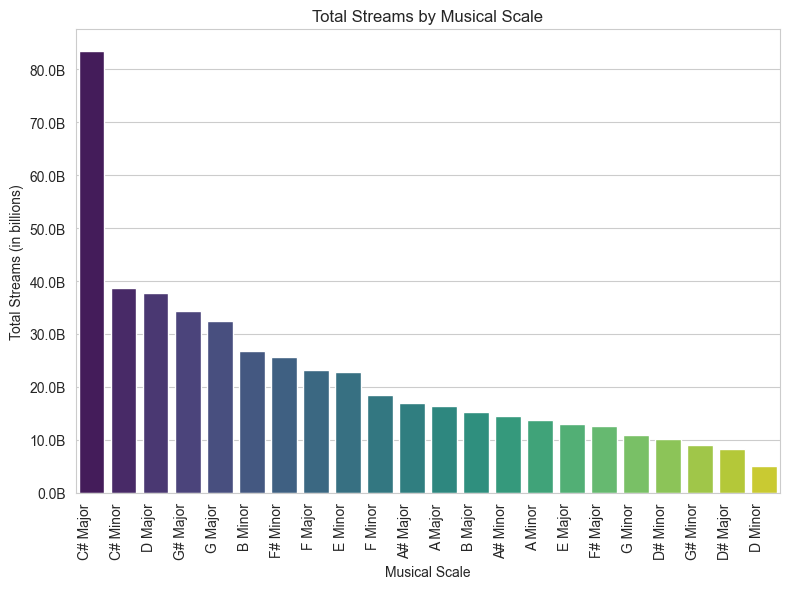

In [68]:
# Sort scales by total streams
scale_streams = scale_streams.sort_values(by="streams", ascending=False)

# Set the style of the plot
sb.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sb.barplot(data=scale_streams, x="scale", y="streams", palette="viridis")

# Customize the plot
plt.title("Total Streams by Musical Scale", fontsize=12)
plt.xlabel("Musical Scale", fontsize=10)
plt.ylabel("Total Streams (in billions)", fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')

# Format y-axis labels to display numbers in billions
import matplotlib.ticker as ticker
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x*1e-9:.1f}B'))

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

#display
plt.show()

- C# Major Dominance: The musical scale C# Major has the highest total streams, surpassing 80 billion streams.

- Other Prominent Scales: C# Minor, D Major, G# Major, and G Major each have significant streams, ranging between 30 billion and 40 billion.



#### Graph 2 : total streams for each year in Billions

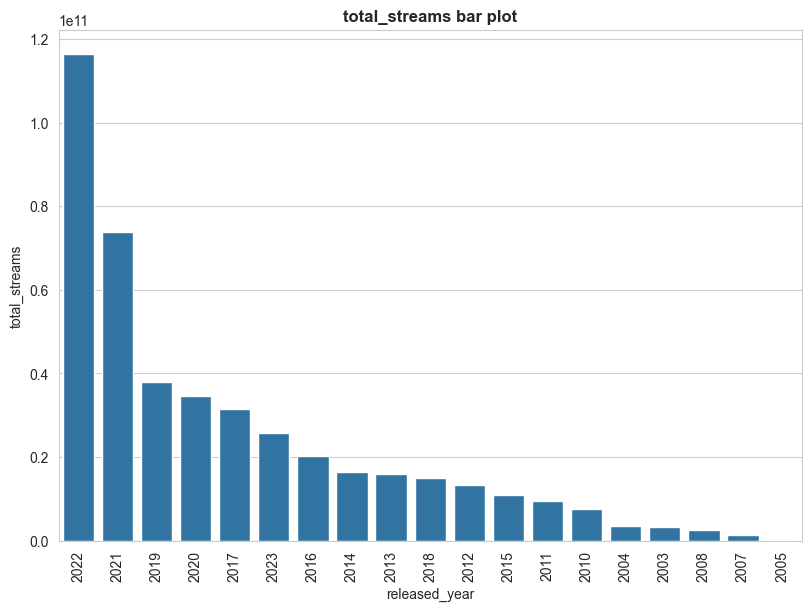

In [69]:
#bar plot showing the total streams for each year with 'released_year' on the X-axis and 'total_streams' on the Y-axis
ordering = group_data.sort_values('total_streams',ascending=False).released_year
plotting_bar(group_data,'released_year','total_streams',ordering=ordering)

#### Graph 3:  Average Streams per Song by Release Month (2015-2023)
##### What are the seasonal trends in music streaming, and how do average streams per song vary by release month from 2015 to 2023?

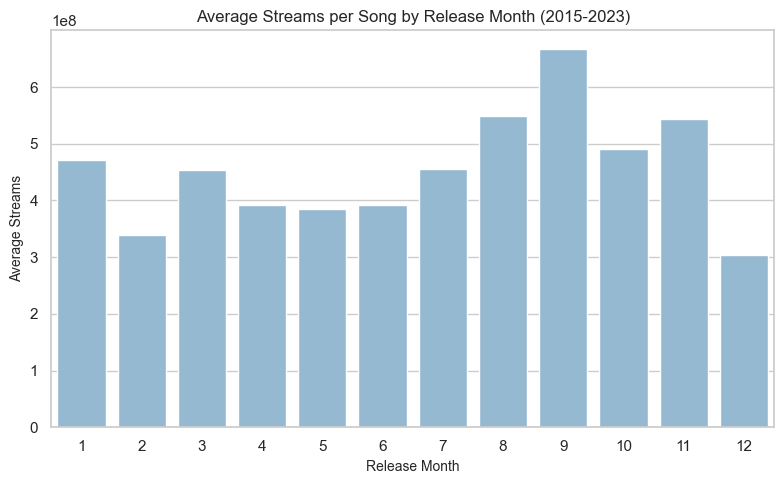

In [70]:
plt.figure(figsize=(8, 5))
sb.set_theme(style='whitegrid', palette='Blues_d')

##monthly_avg_streams = songs_2015_2023.groupby(songs_2015_2023.release_date.dt.month)['streams'].mean().reset_index()
#monthly_avg_streams.columns = ['month','average_streams']
#monthly_avg_streams = monthly_avg_streams.sort_values(by='average_streams', ascending=False)

monthly_avg_streams.columns = ['month','average_streams']
sb.barplot(data=monthly_avg_streams, x='month', y='average_streams')

plt.title('Average Streams per Song by Release Month (2015-2023)', fontsize=12)
plt.xlabel('Release Month', fontsize=10)
plt.ylabel('Average Streams', fontsize=10)

# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### These insights reveal a clear seasonal trend in music streaming, with songs released towards the end of summer and early fall achieving higher average streams compared to those released in December.

- Highest Average Streams: Songs released in September have the highest average streams, followed by those released in August and November.

- Lowest Average Streams: December releases have the lowest average streams.

- Seasonal Patterns: Late summer and early fall releases tend to perform better in terms of streaming numbers.

- Influencing Factors: The trends could be influenced by factors such as summer vacations, back-to-school periods, and holiday preparations.


#### Graph 4(Bar): What Is The Most Popular Month by Number of Songs Released?

The bar chart depicts the number of songs released each month. The x-axis represents the months from January to December, and the y-axis represents the number of songs released.


C:\Users\BackP\AppData\Local\Temp\ipykernel_64304\134513454.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=top_years, x='release_date', y='song_count', palette='viridis')


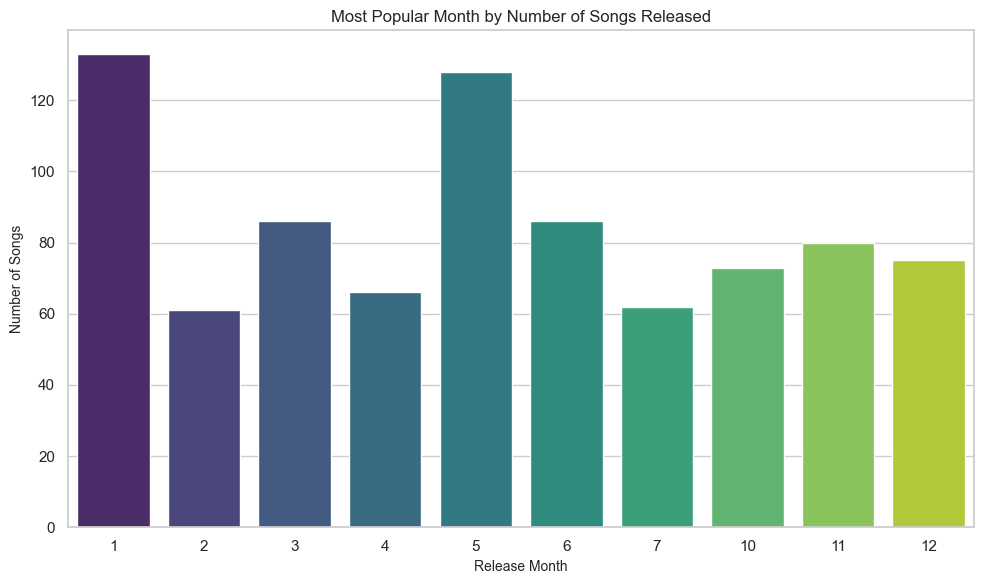

In [71]:

song_counts = songs_eda.groupby(songs_eda.release_date.dt.month)['streams'].count().reset_index(name='song_count')

# rate the most popular month for song release date
top_years = song_counts.nlargest(10, 'song_count')

plt.figure(figsize=(10, 6))
sb.barplot(data=top_years, x='release_date', y='song_count', palette='viridis')
plt.title('Most Popular Month by Number of Songs Released', fontsize=12)
plt.xlabel('Release Month', fontsize=10)
plt.ylabel('Number of Songs', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


- Highest Number of Releases in January: The chart shows that the highest number of songs were released in January, with over 120 songs. This indicates that January is the most popular month for song releases.
- Significant Releases in May: May also has a high number of song releases, with around 120 songs, making it another popular month for releases.
- The distribution of song releases across the months is not even, with significant peaks in January and May, and lower numbers in February and July. This suggests that there may be strategic or seasonal factors influencing the timing of song releases.

#### Graph 5: Distribution of Song Releases by Day of the Month

##### What is the distribution of song release days within a month, and are there specific days that have a higher or lower number of releases?

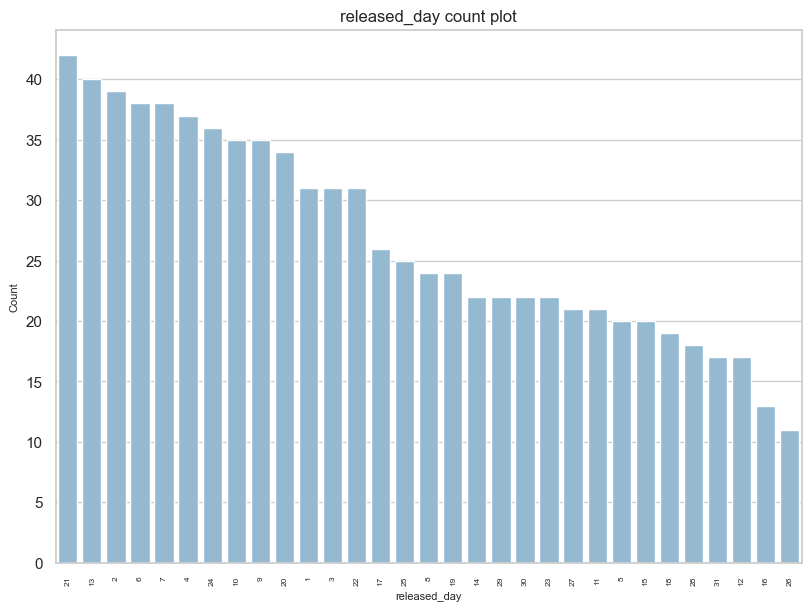

In [72]:
#released songs count by day(s)
plotting_count(songs_2015_2023.sort_values(by='released_day'),'released_day')

- Highest Count: The 21st day of the month shows the highest number of song releases, with around 40 releases.

- Lowest Count: The 26th day of the month shows the lowest number of song releases, with around 10 releases.

#### Graph 6: disparity in counts between the "Major" and "Minor" modes

#####  Which mode is more common?

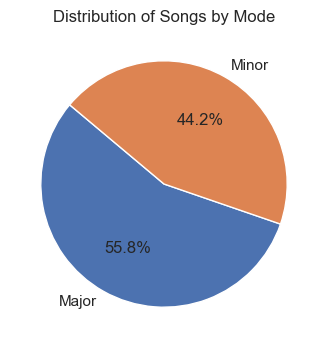

In [85]:
# Major mode is more common 
mode_counts = songs_2015_2023['mode'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Songs by Mode')
plt.show()

- Major Mode Dominance: The "Major" mode has a count slightly above 400, indicating it is the more frequent mode.

- Minor Mode Frequency: The "Minor" mode has a count slightly above 300, showing it is less frequent compared to the "Major" mode.

- Comparative Analysis: The graph highlights a clear difference in frequency, with "Major" occurrences being more common than "Minor" occurrences.

#### Graph 7: Correlation heatmaps : Relationships between numerical features 


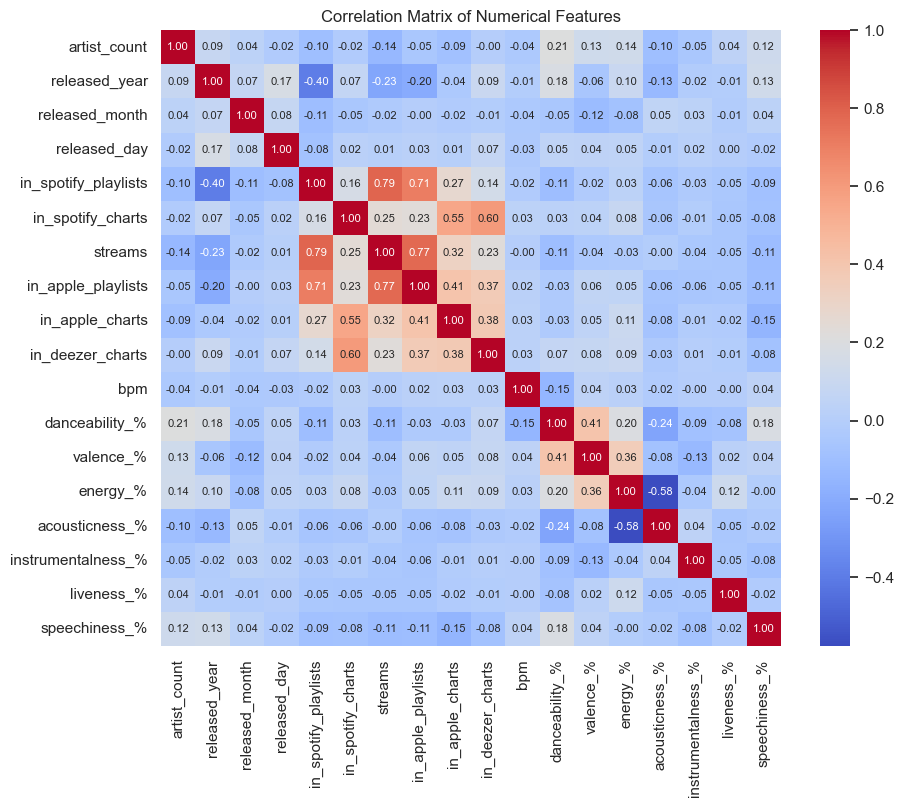

In [74]:
# Creating correlation heatmaps to understand relationships between numerical features
# Select only numeric columns for correlation computation
numeric_data = songs_eda.select_dtypes(include='number')

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))

sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})
plt.title('Correlation Matrix of Numerical Features')
plt.show()



Insights:

- Positive Correlations: A high positive correlation between streams and in_spotify_playlists suggests that songs featured in Spotify - playlists tend to have higher stream counts.

- Negative Correlations: A negative correlation between acousticness_% and energy_% suggests that more acoustic songs tend to have lower energy levels.

- Weak/No Correlations: Correlations close to 0 indicate weak or no relationship between the features, such as released_day and bpm.

Understanding these relationships can be highly useful for various tasks like music recommendation, playlist generation, and exploring trends in music data.

#### Graph 8(Heatmap): Correlation Matrix of Music-Related Metrics
##### What are the correlations between various music-related metrics, and how do they influence each other?

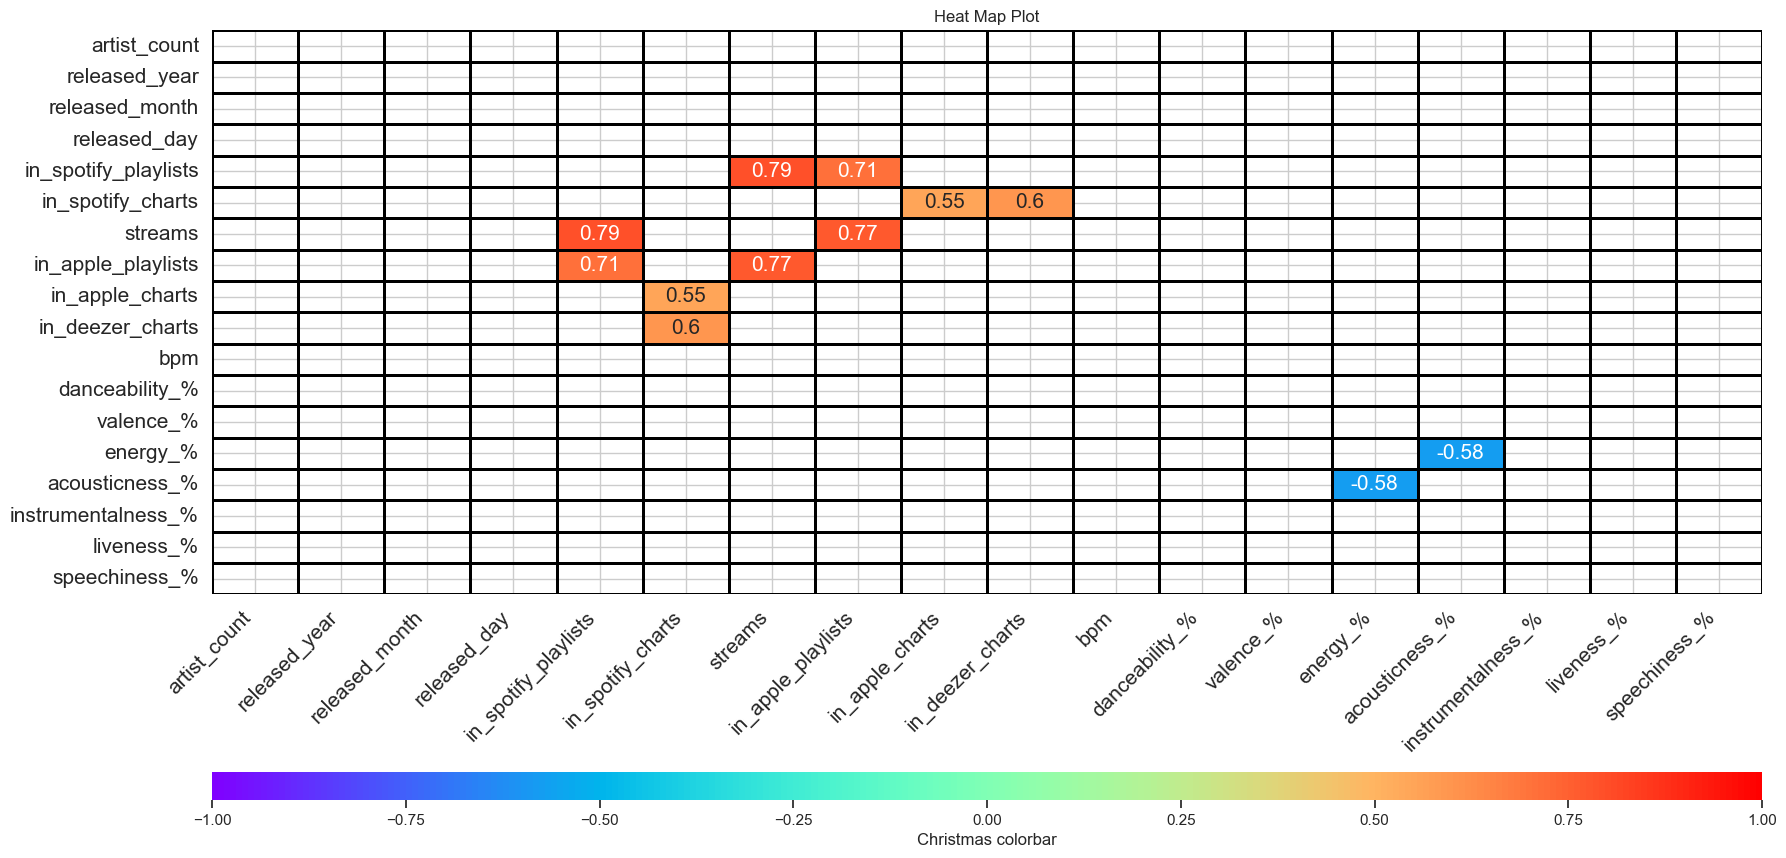

In [75]:
plotting_heatmap(songs_eda, num)

- Strong Positive Correlations:

    *  Streams and In_Spotify_Charts (0.79): Songs frequently featured in Spotify charts tend to have higher stream counts.
    * Streams and In_Apple_Playlists (0.71): Inclusion in Apple playlists is associated with higher streams.
    * In_Spotify_Charts and In_Apple_Playlists (0.77): Songs featured in Spotify charts are often also included in Apple playlists.

--------------------------------
- Moderate Positive Correlations:

    * In_Apple_Playlists and In_Apple_Charts (0.55): Songs in Apple playlists are often featured in Apple charts.
    * In_Spotify_Charts and In_Deezer_Charts (0.60): Some overlap between songs charted on Spotify and Deezer.

--------------------------------------
- Moderate Negative Correlations:

    * Acousticness_% and Energy_% (-0.58): More acoustic songs tend to have lower energy levels.
    * Acousticness_% and Instrumentalness_% (-0.58): Songs with higher acousticness tend to have lower instrumentalness.
------
These insights reveal key relationships between various musical features, emphasizing the significant influence of playlist and chart inclusions on streams, as well as the trade-offs between acousticness and other musical attributes.

#### Graph 9: Most Songs in the Top Songs List & Most Streamed Artists 
##### Which artists have the highest total streams?
##### Which artists have the most songs featured in the top songs list?

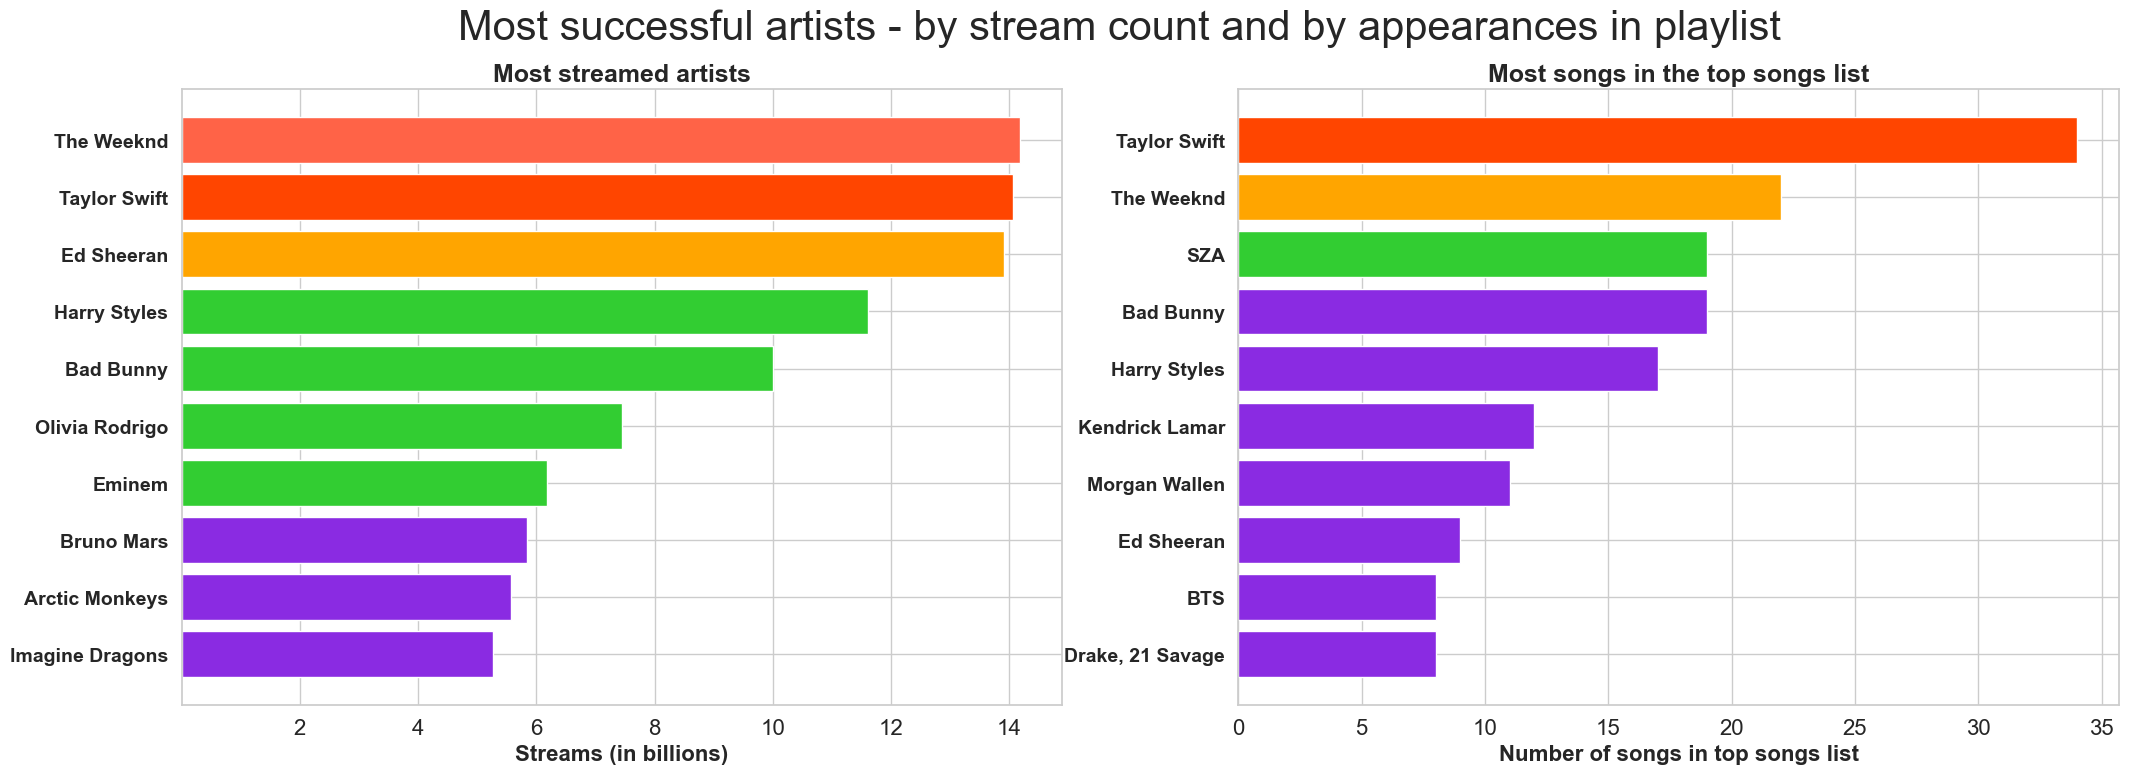

In [76]:

#Groped by artist and Most Streamed sum
stream_sum = songs_eda.groupby("artist(s)_name")[["streams"]].sum().nlargest(10, "streams").sort_values("streams", ascending=True)
stream_sum_list = list(stream_sum.groupby("artist(s)_name")["streams"].sum())
stream_sum_list.sort()

#Grouped by Artist and streams count
song_count = songs_eda.groupby("artist(s)_name")[["streams"]].count().nlargest(10, "streams").sort_values("streams", ascending=True)
song_count_list = list(song_count.groupby("artist(s)_name")["streams"].sum())
song_count_list.sort()

plt.figure(figsize=(25,8))
plt.suptitle("Most successful artists - by stream count and by appearances in playlist", fontsize=30)

#Artits most popular
plt.subplot(1,2,1)
plt.barh(stream_sum.index, stream_sum_list, color=["#8A2BE2"]*3 + ["#32CD32"]*4 + ["#FFA500", "#FF4500", "#FF6347"])
plt.title("Most streamed artists", fontsize=18, fontweight="bold")
plt.xticks([2e9, 4e9, 6e9, 8e9, 1e10, 1.2e10, 1.4e10], labels=["2", "4", "6", "8", "10", "12", "14"], fontsize=16)
plt.xlabel("Streams (in billions)", fontsize=16, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

#Artists with the most songs in top hits
plt.subplot(1,2,2)
plt.barh(song_count.index, song_count_list, color=["#8A2BE2"]*7 + ["#32CD32"] + ["#FFA500", "#FF4500", "#FF6347"])
plt.title("Most songs in the top songs list", fontsize=18, fontweight="bold")
plt.xticks(fontsize=16)
plt.xlabel("Number of songs in top songs list", fontsize=16, fontweight="bold")
plt.yticks(fontsize=14, fontweight="bold")

plt.show()

- Top Artists by Streams:The top 10 artists by total streams are The Weeknd (approx. 14.5 billion), Taylor Swift (approx. 14 billion), and Ed Sheeran (approx. 12 billion).

- Notable Artists: Other prominent artists include Harry Styles, Bad Bunny, Olivia Rodrigo, Eminem, Bruno Mars, Arctic Monkeys, and Imagine Dragons.

- Stream Count Range: Stream counts range from 7 billion to 14.5 billion.


- Top Artists by Number of Songs: The top 10 artists with the most songs in the top songs list are Taylor Swift (34 songs), The Weeknd (27 songs), and SZA (20 songs).

Other Artists: Other notable artists include Bad Bunny, Harry Styles, Kendrick Lamar, Morgan Wallen, Ed Sheeran, BTS, and Drake with 21 Savage.


#### GRAPH 10 (Histogram): BPM Song Tempos popularity

##### What is the distribution of song tempos (BPM) in the dataset, and how does it relate to the popularity of songs?


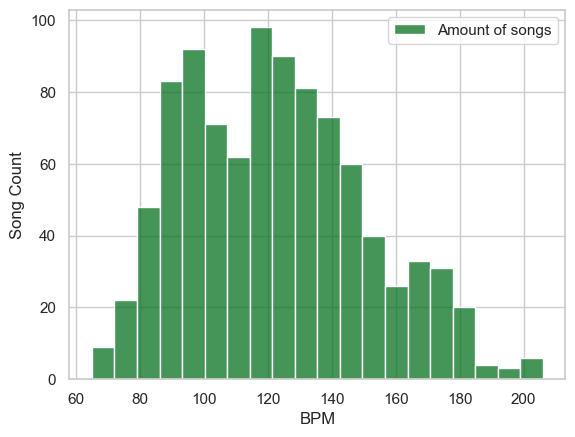

In [77]:
sb.histplot(data=songs_eda, x="bpm", fill=True, bins=20, color="#067020")
plt.legend(["Amount of songs"])
plt.xlabel("BPM")
plt.ylabel("Song Count")
plt.show()


- The most common tempo is around 120 BPM, with a noticeable peak in the 100-120 BPM range, indicating a preference for moderate-fast tempos.

- The distribution appears to follow a normal distribution, also known as a bell curve.

- The broad range of BPM values highlights that the relationship between song popularity and tempo is not linear, as different BPM ranges have varying levels of popularity.

- Distribution of Tempos: The histogram illustrates the distribution of song tempos in the dataset, showing a prominent peak around 120 BPM. This peak suggests that moderate-fast tempos are more common and likely preferred, although the relationship between tempo and popularity is not straightforward due to the wide range of BPM values.

#### Graph 11(Scatter): Relationship between Streams and Energy %

##### How does the energy percentage of a song relate to its total stream count?

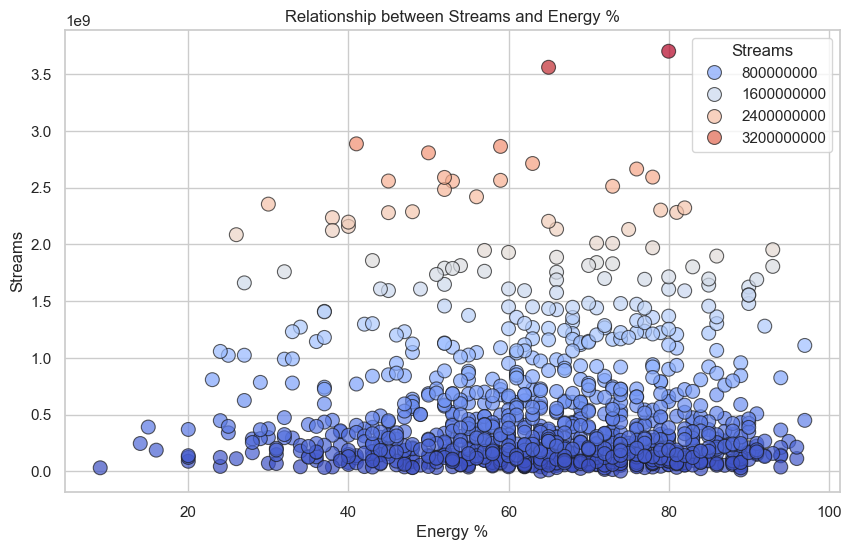

In [78]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=songs_eda, x='energy_%', y='streams', hue='streams', palette='coolwarm', alpha=0.7, edgecolor='k', s=100)
plt.title('Relationship between Streams and Energy %')
plt.xlabel('Energy %')
plt.ylabel('Streams')
plt.legend(title='Streams')
plt.show()

- Concentration of Lower Energy Songs: The majority of songs have lower energy percentages (0-40%) and correspondingly lower stream counts (0-800,000,000).

- Increase in Streams with Energy: There are fewer songs with higher energy percentages (40-100%), these songs tend to have higher stream counts, as indicated by the red and orange data points.

- Distribution: The scatter plot shows a wide distribution of stream counts across different energy percentages, indicating no clear linear relationship between energy and streams.

#### Graph 12(Catplot):Popularity of musical scales by streams within top songs dataset

<Figure size 2500x800 with 0 Axes>

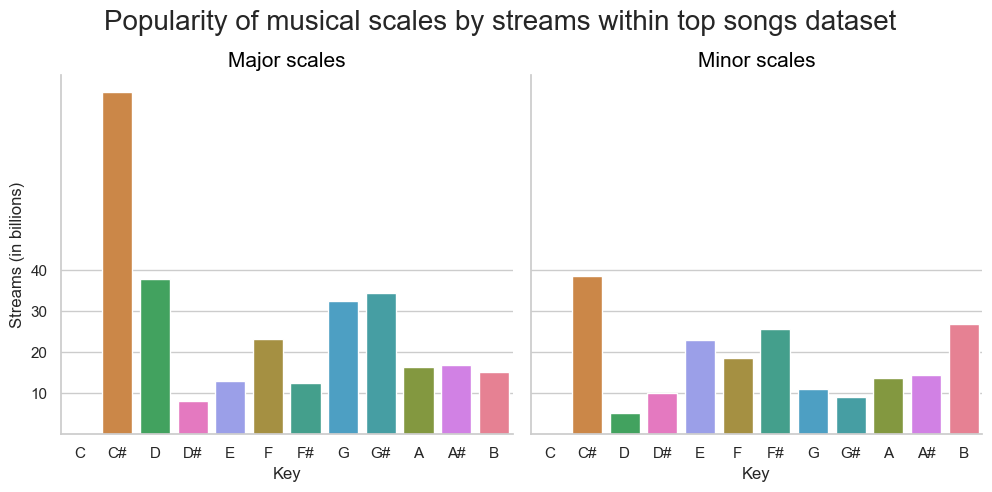

In [79]:
plt.figure(figsize = (25, 8))

scales_graph = sb.catplot(data = songs_eda, x = "key", y = "streams", col = "mode", kind = "bar", estimator = "sum", errorbar=None, hue = "key",
           order = ["C", "C#","D","D#","E","F","F#","G","G#","A","A#","B"]) # The actual order of musical notes, from C and up
scales_graph.set_titles(col_template="{col_name} scales", row_template="{row_name}", color = "#000000", size = 15)
scales_graph.set_ylabels("Streams (in billions)", fontsize = 12)
scales_graph.set_xlabels("Key")
plt.yticks([1e10, 2e10, 3e10, 4e10], labels = [10, 20, 30, 40]) # Converting the y-tick values to billions of streams
scales_graph.fig.subplots_adjust(top=0.85)
scales_graph.fig.suptitle("Popularity of musical scales by streams within top songs dataset", size = 20)

plt.show()

### Conclusion 🚀

Our comprehensive analysis of music streaming data has provided a wealth of valuable insights into various aspects of the music industry. Here are the top insights gathered through our analysis:

1. **C# Major Dominance:** The musical scale **C# Major** leads with the highest total streams, surpassing **80 billion streams**.
2. **Other Prominent Scales:** **C# Minor, D Major, G# Major,** and **G Major** each have significant streams, ranging between **30 billion and 40 billion**.
3. **Seasonal Trends in Music Streaming:** Songs released towards the end of summer and early fall achieve higher average streams compared to those released in December. **September releases** have the highest average streams, followed by **August and November**, while **December releases** have the lowest average streams.
4. **Popular Release Months:** **January** sees the highest number of song releases, with over **120 songs**, followed closely by **May**. This suggests strategic or seasonal factors influencing the timing of song releases.
5. **Distribution of Release Days:** The **21st day** of the month has the highest number of song releases, around **40**, while the **26th day** has the lowest, around **10**.
6. **Major Mode Dominance:** The **"Major" mode** is more common than the **"Minor" mode**, with counts slightly above **400** and **300**, respectively.
7. **Positive Correlations:** Songs featured in Spotify playlists tend to have higher stream counts, and inclusion in Apple playlists is also associated with higher streams. The correlation matrix reveals strong positive correlations between streams and chart inclusions.
8. **Moderate Negative Correlations:** There are negative correlations between **acousticness_%** and **energy_%** as well as **acousticness_%** and **instrumentalness_%**, indicating that more acoustic songs tend to have lower energy and instrumentalness levels.
9. **Top Streaming Artists:** **The Weeknd** leads with approximately **14.5 billion streams**, followed by **Taylor Swift** and **Ed Sheeran**. Other notable artists include **Harry Styles, Bad Bunny**, and **Olivia Rodrigo**.
10. **Most Songs in the Top Songs List:** **Taylor Swift** has the most songs featured in the top songs list, with **34 songs**, followed by **The Weeknd** and **SZA**.
11. **Song Tempos and Popularity:** The most common tempo is around **120 BPM**, indicating a preference for moderate-fast tempos. The distribution follows a normal bell curve, highlighting varying levels of popularity across different BPM ranges.
12. **Energy Percentage and Streams:** Songs with higher energy percentages (**40-100%**) tend to have higher stream counts, although the majority of songs have lower energy percentages (**0-40%**) and correspondingly lower stream counts.

These insights not only validate our initial hypotheses but also open up new avenues for further exploration and understanding of music streaming dynamics. The data-driven analysis provides actionable intelligence that can inform strategic decisions in the music industry and beyond.

### Further Exploration 🧭 🚀

To deepen our understanding of music streaming and its dynamics, we can explore the following avenues:

1. **Listener Demographics:** Investigate how different demographic groups (age, gender, location) influence streaming patterns and preferences.
2. **Impact of Marketing and Promotion:** Analyze the impact of marketing campaigns and promotional activities on streaming numbers and song popularity.
3. **Genre-Specific Trends:** Examine trends and patterns within specific music genres to understand how genre influences streaming behavior.
4. **Social Media Influence:** Study the correlation between social media activity (mentions, shares, likes) and streaming numbers to understand the role of social media in music promotion.
5. **Longitudinal Analysis:** Conduct a longitudinal study to track changes in streaming patterns and preferences over time.
6. **Collaborations and Features:** Analyze the impact of collaborations and featured artists on the success and popularity of songs.
7. **User-Generated Playlists:** Explore the influence of user-generated playlists on streaming numbers and song discovery.
8. **Economic Factors:** Investigate how economic conditions (e.g., recessions, income levels) affect music streaming behavior and preferences.
9. **Technological Advancements:** Study the impact of new technologies (e.g., AI-based recommendations, streaming platform features) on music consumption patterns.
10. **Cultural and Social Events:** Analyze the effect of major cultural and social events (e.g., festivals, global events) on music streaming trends.

By exploring these areas, we can gain a deeper understanding of the various factors that influence music streaming and uncover new insights to drive strategic decision-making in the music industry.
